In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
# Завантаження датасету
california_housing = fetch_california_housing(as_frame=True)

# Перетворення в DataFrame
df = california_housing.frame

# Виведення перших 5 рядків
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
# Перевірка наявності пропусків
missing_values = df.isnull().sum()

# Виведення кількості пропусків у кожному стовпці
print(missing_values)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [4]:
duplicates = df.duplicated().sum()

# Виведення кількості дублікатів
print(f"Кількість дублікатів: {duplicates}")

Кількість дублікатів: 0


In [5]:
# Перевірка типів даних у стовпцях DataFrame
data_types = df.dtypes

# Виведення типів даних
print(data_types)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


2

In [6]:
from sklearn.preprocessing import StandardScaler

# Ініціалізація StandardScaler
scaler = StandardScaler()

# Масштабування ознак
scaled_features = scaler.fit_transform(df.drop('MedHouseVal', axis=1))

# Створення нового DataFrame з масштабованими ознаками
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# Додавання цільової змінної до нового DataFrame
scaled_df['MedHouseVal'] = df['MedHouseVal'].values

# Виведення перших 5 рядків масштабованого DataFrame
print(scaled_df.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  MedHouseVal  
0  -1.327835        4.526  
1  -1.322844        3.585  
2  -1.332827        3.521  
3  -1.337818        3.413  
4  -1.337818        3.422  


3

In [7]:
from sklearn.model_selection import train_test_split

# Відокремлюємо ознаки (X) та цільову змінну (y)
X = scaled_df.drop('MedHouseVal', axis=1)
y = scaled_df['MedHouseVal']

# Поділяємо дані на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Виведення розмірів тренувальних і тестових наборів
print(f'Розмір тренувального набору: {X_train.shape[0]} рядків')
print(f'Розмір тестового набору: {X_test.shape[0]} рядків')

Розмір тренувального набору: 16512 рядків
Розмір тестового набору: 4128 рядків


4

In [8]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [9]:
# Ініціалізація моделей
linear_regressor = LinearRegression()
ridge_regressor = Ridge()
random_forest_regressor = RandomForestRegressor()

In [10]:
# Налаштування параметрів для GridSearchCV
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
param_grid_linear = {}

In [11]:
# Ініціалізація GridSearchCV для Ridge-регресії
grid_search_ridge = GridSearchCV(estimator=ridge_regressor, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_
print(f'Найкращі параметри для Ridge: {grid_search_ridge.best_params_}')

Найкращі параметри для Ridge: {'alpha': 1.0}


In [12]:
# Ініціалізація GridSearchCV для RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(f'Найкращі параметри для RandomForestRegressor: {grid_search_rf.best_params_}')

KeyboardInterrupt: 

In [13]:
# Лінійна регресія не потребує GridSearch, тому що параметри вже є за замовчуванням
best_linear = linear_regressor
best_linear.fit(X_train, y_train)

LinearRegression()

In [15]:
models = {
    'Лінійна регресія': best_linear,
    'Ridge регресія': best_ridge,
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} - MSE: {mse:.4f}')

Лінійна регресія - MSE: 0.5559
Ridge регресія - MSE: 0.5559


5

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

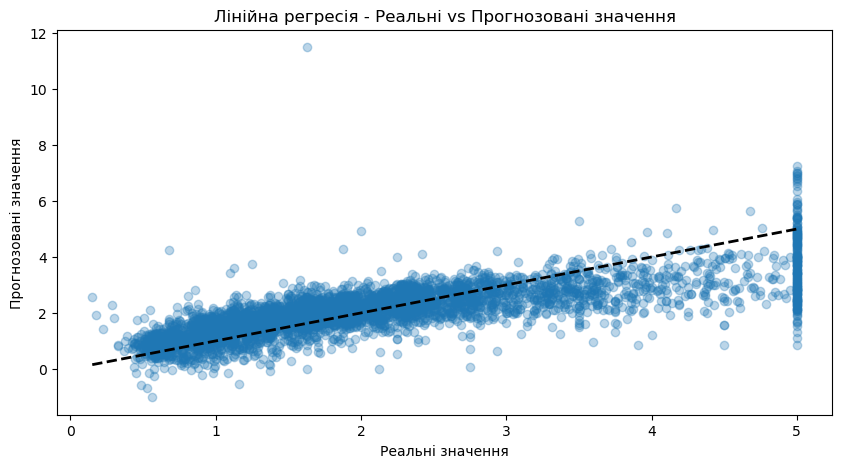

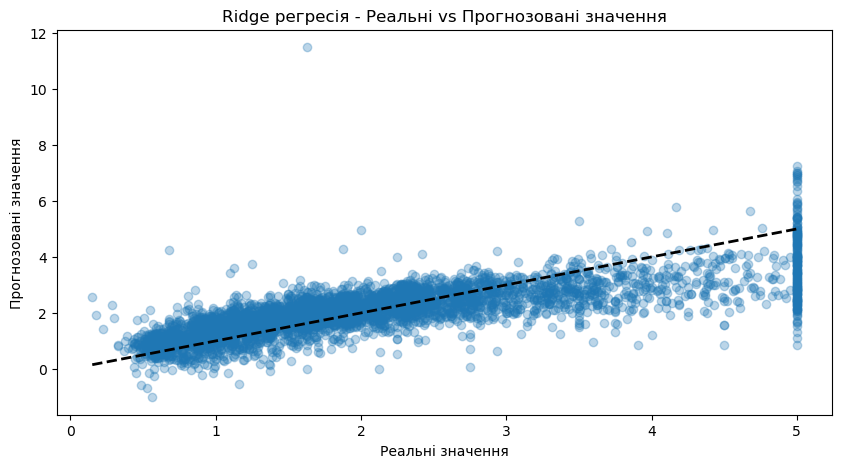

Лінійна регресія - MSE: 0.5559, R2: 0.5758
Ridge регресія - MSE: 0.5559, R2: 0.5758


In [17]:
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    
    # Побудова графіка реальних і прогнозованих значень
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Реальні значення')
    plt.ylabel('Прогнозовані значення')
    plt.title(f'{name} - Реальні vs Прогнозовані значення')
    plt.show()

# Виведення результатів
for name, metrics in results.items():
    print(f'{name} - MSE: {metrics["MSE"]:.4f}, R2: {metrics["R2"]:.4f}')

6

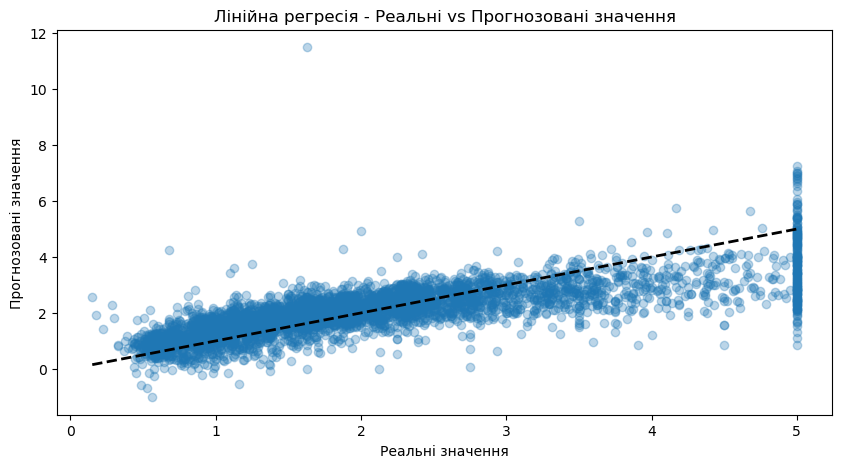

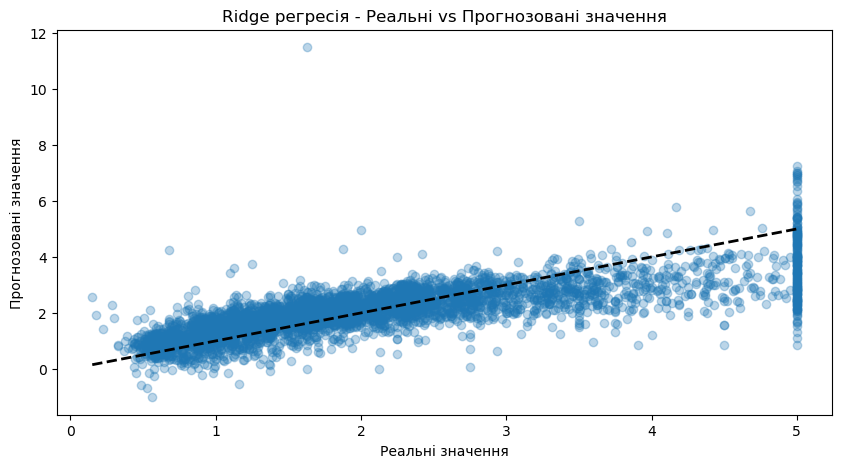

Лінійна регресія - MSE: 0.5559, R2: 0.5758

Лінійна регресія - Порівняння реальних і прогнозованих значень:
       Реальні значення  Прогнозовані значення
20046           0.47700               0.719123
3024            0.45800               1.764017
15663           5.00001               2.709659
20484           2.18600               2.838926
9814            2.78000               2.604657
Ridge регресія - MSE: 0.5559, R2: 0.5758

Ridge регресія - Порівняння реальних і прогнозованих значень:
       Реальні значення  Прогнозовані значення
20046           0.47700               0.719473
3024            0.45800               1.763846
15663           5.00001               2.709284
20484           2.18600               2.838762
9814            2.78000               2.604190


In [18]:
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2, 'True Values': y_test, 'Predicted Values': y_pred}
    
    # Побудова графіка реальних і прогнозованих значень
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Реальні значення')
    plt.ylabel('Прогнозовані значення')
    plt.title(f'{name} - Реальні vs Прогнозовані значення')
    plt.show()

# Виведення результатів
for name, metrics in results.items():
    print(f'{name} - MSE: {metrics["MSE"]:.4f}, R2: {metrics["R2"]:.4f}')
    
    # Створення DataFrame для реальних і прогнозованих значень
    comparison_df = pd.DataFrame({
        'Реальні значення': metrics['True Values'],
        'Прогнозовані значення': metrics['Predicted Values']
    })
    
    print(f'\n{name} - Порівняння реальних і прогнозованих значень:')
    print(comparison_df.head())